In [1]:
import pandas as pd
import numpy as np
avocado=pd.read_csv(r"avocado.csv", encoding="ISO-8859-1")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
avocado.drop(['Unnamed: 0'], axis = 1, inplace = True)
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)

def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
    
avocado['season'] = avocado.Date.map(season_of_date)
avocado.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,autumn
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,autumn
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,autumn
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,autumn
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,autumn
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11,autumn
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11,autumn
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10,autumn


In [3]:
avocado.drop(['Date'], axis = 1, inplace = True)
avocado.rename(columns = {'4046':'Non organic Small/Medium', '4225':'Non Organic Large', '4770':'Non Organic Extra Large'}, inplace = True)
cols=['Total Volume','Non organic Small/Medium','Non Organic Large','Non Organic Extra Large']
for cname in cols:
    avocado[cname]=avocado[cname].abs().astype('int')
avocado

,AveragePrice,Total Volume,Non organic Small/Medium,Non Organic Large,Non Organic Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,season
0,1.33,64236,1036,54454,48,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,winter
1,1.35,54876,674,44638,58,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,autumn
2,0.93,118220,794,109149,130,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,autumn
3,1.08,78992,1132,71976,72,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,autumn
4,1.28,51039,941,43838,75,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074,2046,1529,0,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,winter
18245,1.71,13888,1191,3431,0,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,winter
18246,1.87,13766,1191,2452,727,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,winter
18247,1.93,16205,1527,2981,727,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,winter


In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AveragePrice              18249 non-null  float64
 1   Total Volume              18249 non-null  int32  
 2   Non organic Small/Medium  18249 non-null  int32  
 3   Non Organic Large         18249 non-null  int32  
 4   Non Organic Extra Large   18249 non-null  int32  
 5   Total Bags                18249 non-null  float64
 6   Small Bags                18249 non-null  float64
 7   Large Bags                18249 non-null  float64
 8   XLarge Bags               18249 non-null  float64
 9   type                      18249 non-null  object 
 10  year                      18249 non-null  int64  
 11  region                    18249 non-null  object 
 12  Month                     18249 non-null  int64  
 13  season                    18249 non-null  object 
dtypes: flo

Text(0.5, 1.0, 'Average Price According to Region')

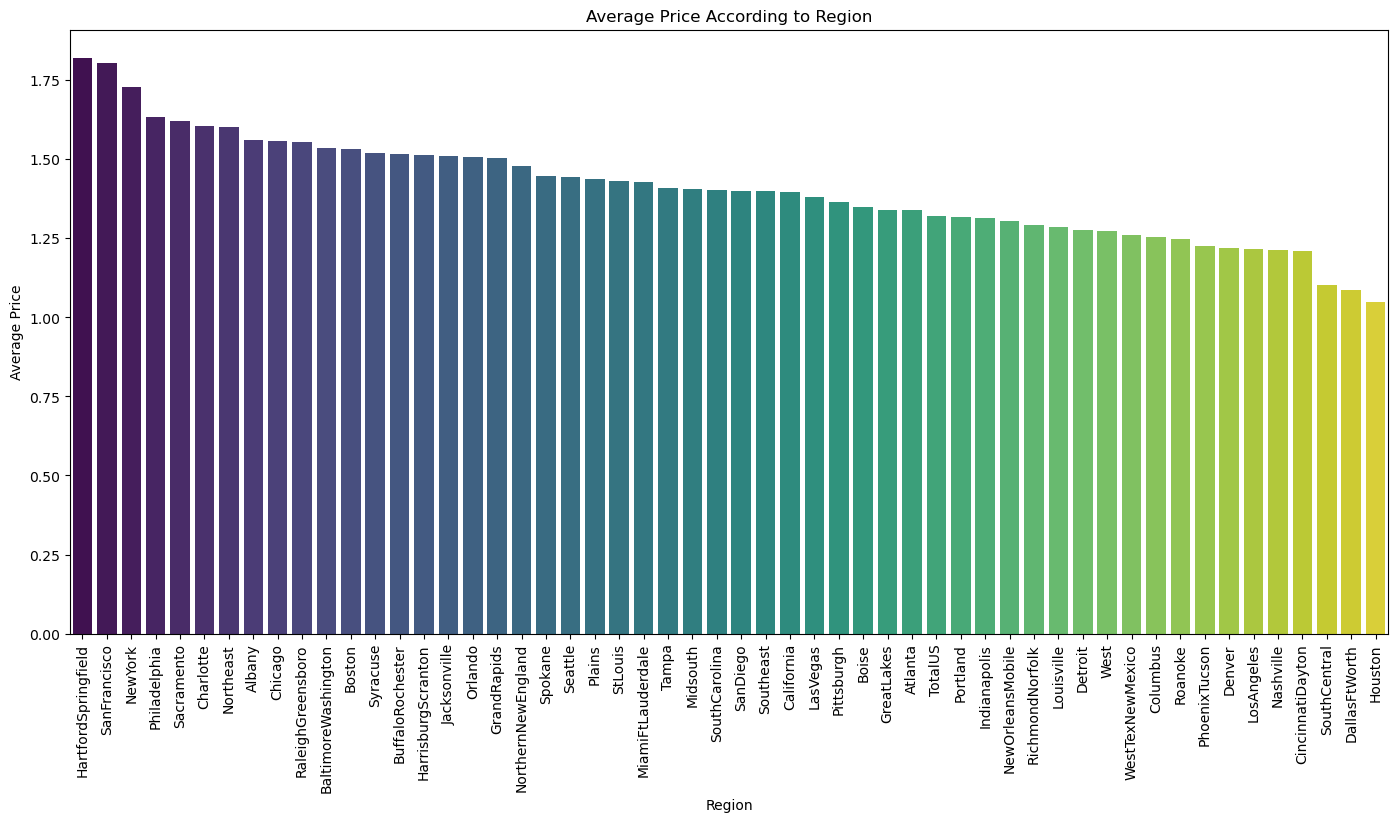

In [5]:
import seaborn as sea
import matplotlib.pyplot as plt

byRegion=avocado.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sea.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

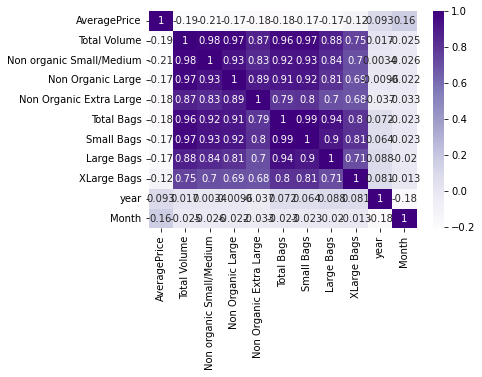

In [6]:
cor=avocado.corr()
sea.heatmap(cor, annot=True, cmap= plt.cm.Purples)
plt.show()

#Hiçbiri AveragePrice ile yüksek düzeyde ilişkili değildir. Saçılım grafikleri içinde nasıl bağıntılı olduklarını görelim, 
#çünkü bazen doğrusal olmayan korelasyon, dağılım grafikleri kullanılarak daha görünür hale gelir. 
#Bu amaçla çift grafiği kullanıyoruz çünkü tüm grafikleri tek bir diyagramda görebiliyoruz.

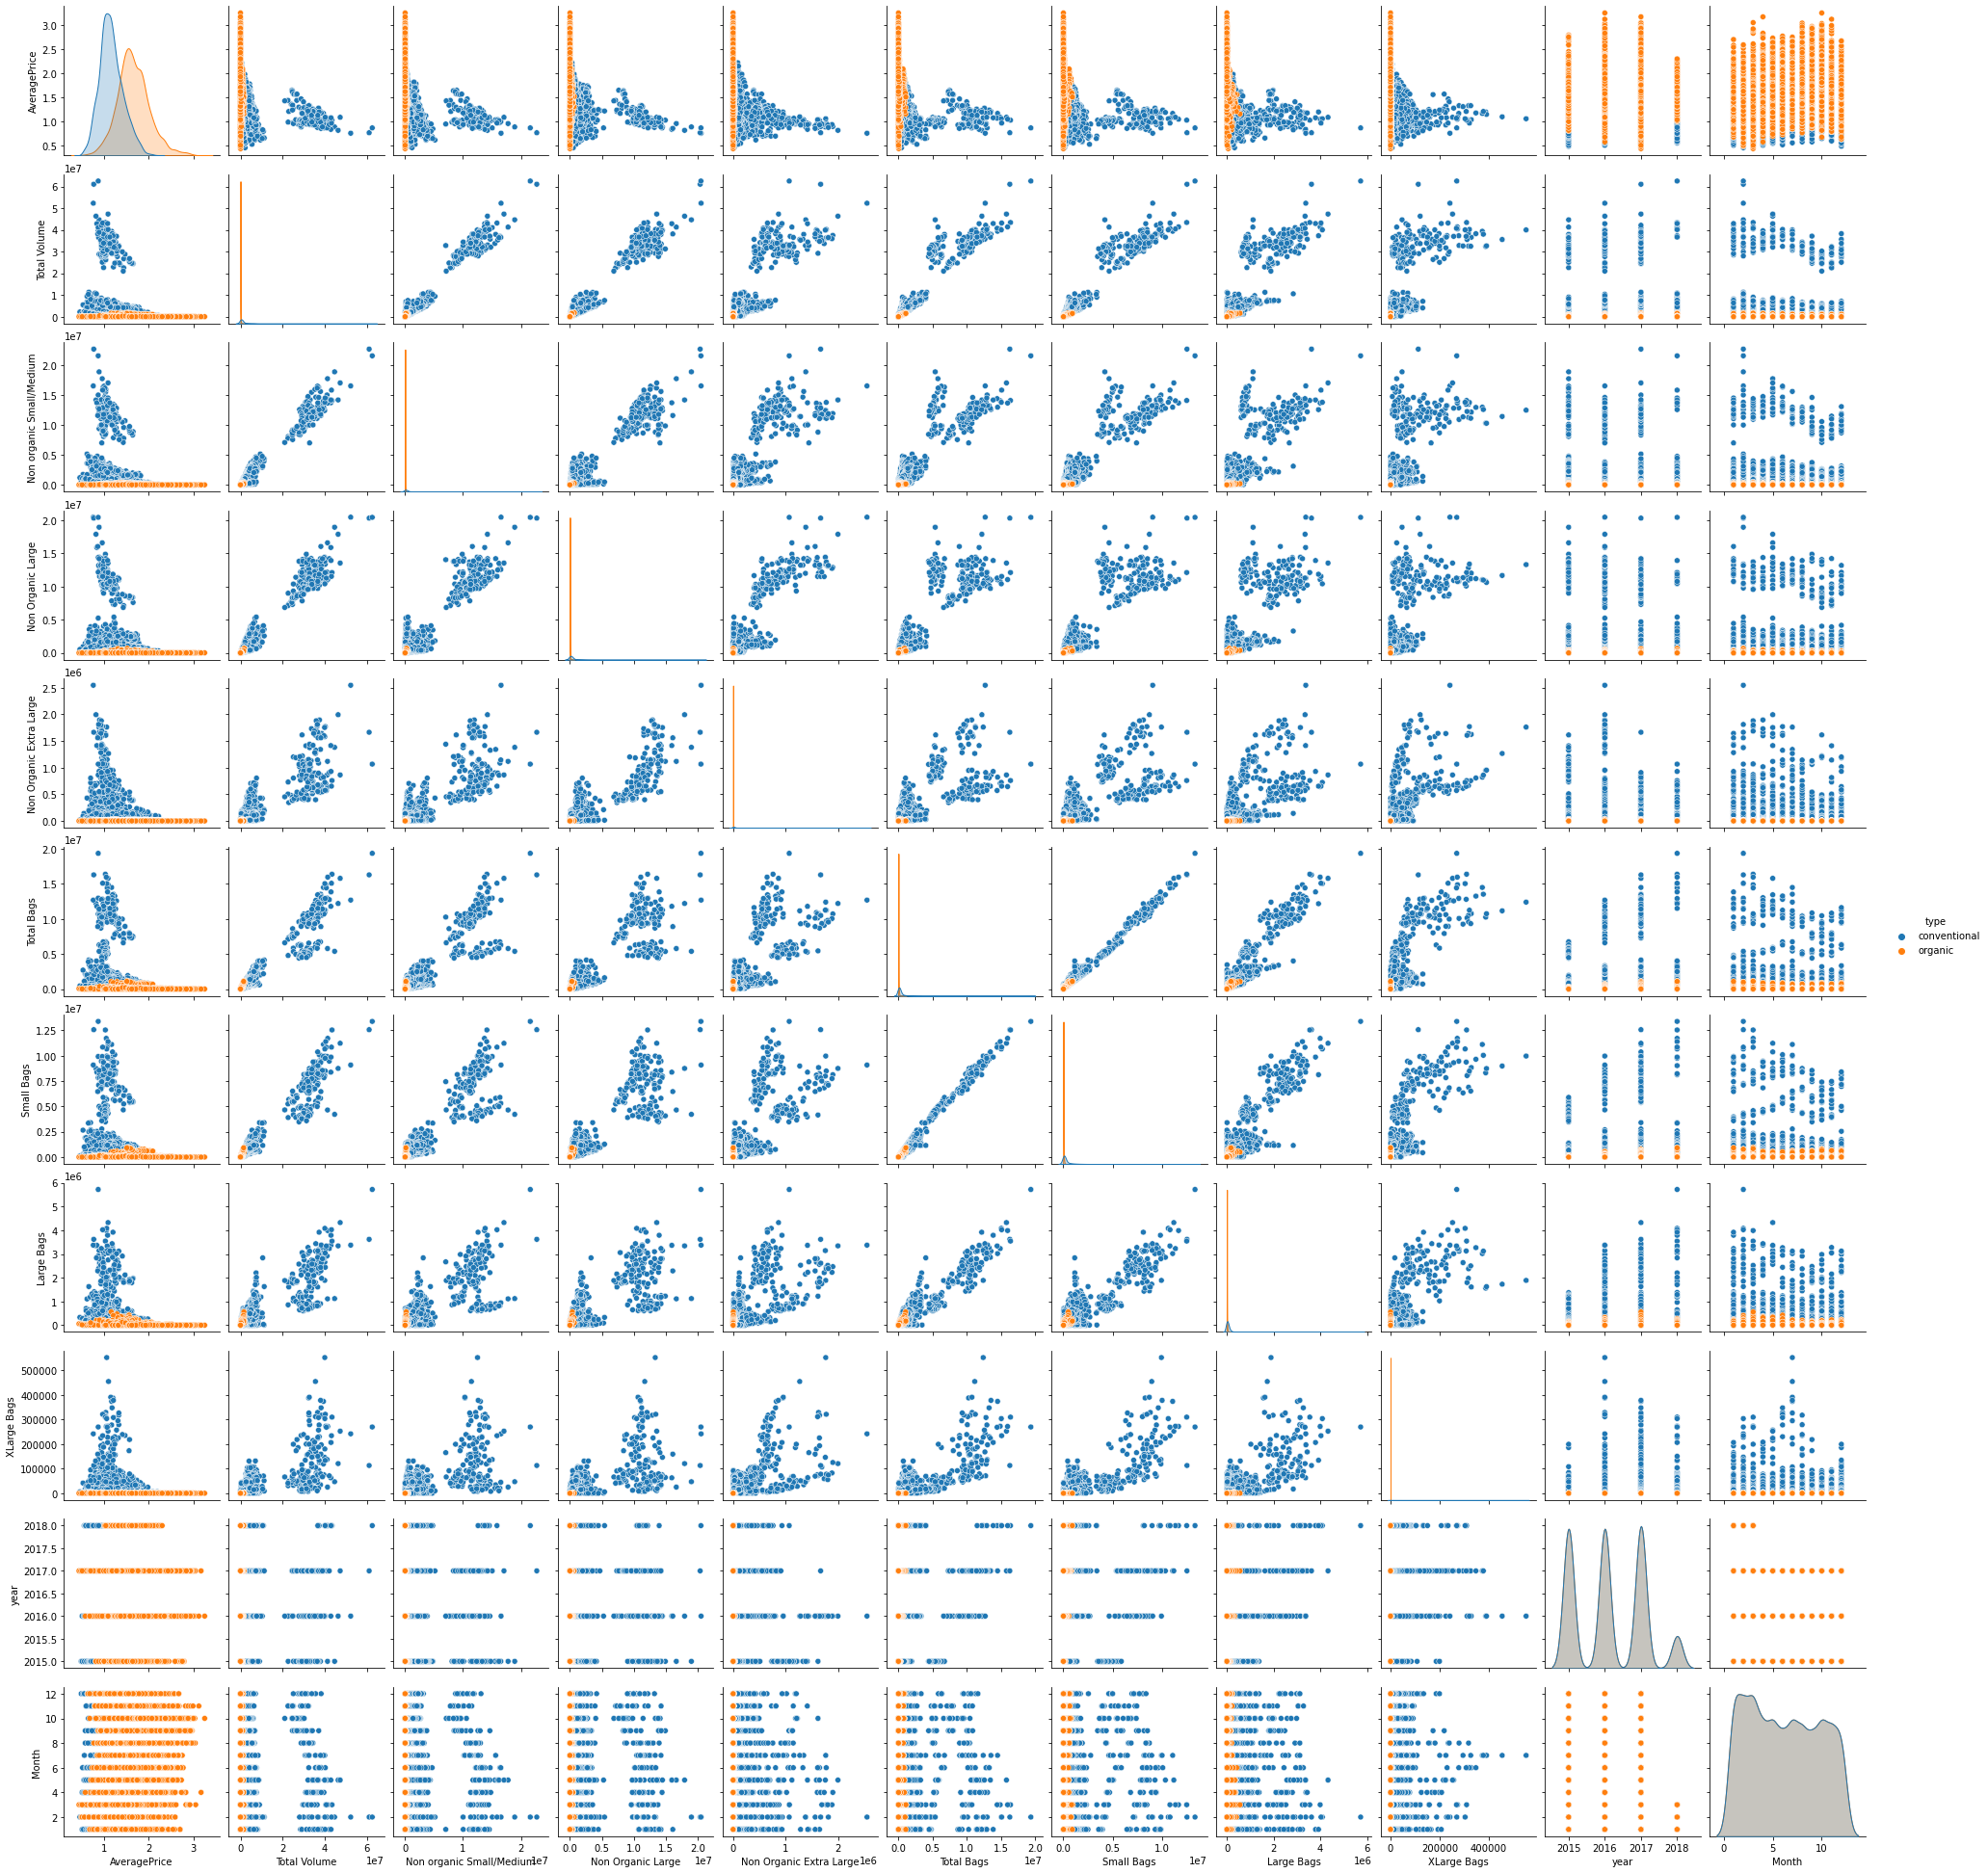

In [7]:
sea.pairplot(avocado, hue='type');

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice'>

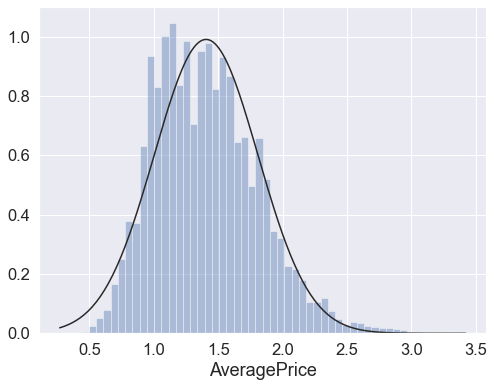

In [8]:
sea.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(8, 6))
sea.distplot(a=avocado.AveragePrice, kde=False, fit=norm)
#Ortalama fiyat hangi aralıkta yer alıyor, dağılım nasıl görünüyor?

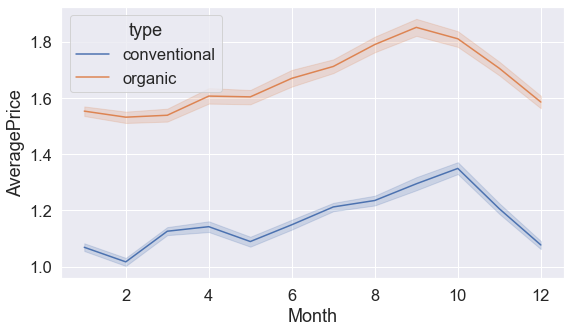

In [9]:
plt.figure(figsize=(9,5))
sea.lineplot(x="Month", y="AveragePrice", hue='type', data=avocado)
plt.show()

In [4]:
avocado['region'] = pd.Categorical(avocado['region'])
avocado['Month'] = pd.Categorical(avocado['Month'])
Dummies_month = pd.get_dummies(avocado['Month'], prefix = 'Month')
Dummies_region = pd.get_dummies(avocado['region'], prefix = 'region')
Dummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
avocado['type']= label_encoder.fit_transform(avocado['type']) 
avocado['season']= label_encoder.fit_transform(avocado['season']) 
avocado

,AveragePrice,Total Volume,Non organic Small/Medium,Non Organic Large,Non Organic Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,season
0,1.33,64236,1036,54454,48,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,3
1,1.35,54876,674,44638,58,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,0
2,0.93,118220,794,109149,130,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,0
3,1.08,78992,1132,71976,72,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,0
4,1.28,51039,941,43838,75,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074,2046,1529,0,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,3
18245,1.71,13888,1191,3431,0,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,3
18246,1.87,13766,1191,2452,727,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,3
18247,1.93,16205,1527,2981,727,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,3


In [7]:
avocado = pd.concat([avocado, Dummies_region], axis=1)
avocado.drop(columns="region",inplace=True, axis=1)
avocado = pd.concat([avocado, Dummies_month], axis=1)
avocado.drop(columns="Month",inplace=True, axis=1)
avocado

,AveragePrice,Total Volume,Non organic Small/Medium,Non Organic Large,Non Organic Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1.33,64236,1036,54454,48,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876,674,44638,58,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220,794,109149,130,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992,1132,71976,72,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039,941,43838,75,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074,2046,1529,0,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888,1191,3431,0,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766,1191,2452,727,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205,1527,2981,727,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=avocado.iloc[:,0:78]
y=avocado['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_test = np.array(y_test,dtype = float)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train.drop(['AveragePrice','type','year','season'],axis=1))
X_test=sc.transform(X_test.drop(['AveragePrice','type','year','season'],axis=1))
X_train

array([[-0.24768322, -0.23592788, -0.24551847, ..., -0.30102668,
         3.43764217, -0.28964867],
       [-0.07931241, -0.11092339, -0.11824442, ..., -0.30102668,
        -0.29089706, -0.28964867],
       [-0.24736189, -0.23441631, -0.24413163, ..., -0.30102668,
         3.43764217, -0.28964867],
       ...,
       [-0.22476388, -0.23524812, -0.20028385, ..., -0.30102668,
        -0.29089706, -0.28964867],
       [-0.1677318 , -0.20164275, -0.12880632, ..., -0.30102668,
        -0.29089706, -0.28964867],
       [-0.24821926, -0.23558921, -0.24506762, ..., -0.30102668,
        -0.29089706, -0.28964867]])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.n_components_

62

In [11]:
#Aşağıda K-fold cross val. temelinde her modelin doğruluğunu bulmaya yönelik bir fonksiyonumuz var

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [12]:
def model_accuracy_pca(model,X_train_pca=X_train_pca,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train_pca, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [13]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import time as time

lr=LinearRegression()
t0 = time.time()
lr.fit(X_train,y_train)
t1 = time.time()
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred,y_test))))
model_accuracy(lr)

Training took 0.02s

MAE: 0.2788558557708745
MSE: 0.11782190592950482
RMSE: 0.3432519569201388
Accuracy: 26.76 %
Standard Deviation: 1.28 %


Text(0, 0.5, 'Y Predicted')

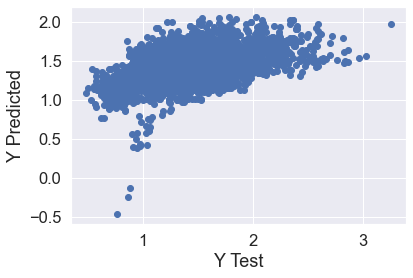

In [56]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [58]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr_pca=LinearRegression()
t0 = time.time()
lr_pca.fit(X_train_pca,y_train)
t1 = time.time()
y_pred_pca = lr_pca.predict(X_test_pca)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_pca,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_pca,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_pca,y_test))))
model_accuracy_pca(lr_pca)

Training took 0.02s

MAE: 0.2845490313739165
MSE: 0.12153182978589362
RMSE: 0.34861415603198564
Accuracy: 24.76 %
Standard Deviation: 1.00 %


Text(0, 0.5, 'Y Predicted')

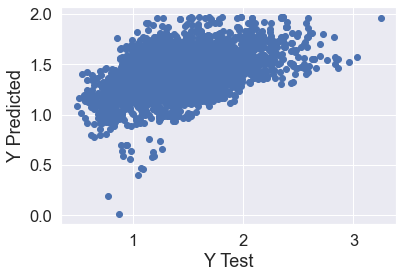

In [59]:
plt.scatter(x=y_test,y=y_pred_pca)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [61]:
from sklearn.svm import SVR
svr = SVR()
t0 = time.time()
svr.fit(X_train,y_train)
t1 = time.time()
y_pred_svr = svr.predict(X_test)
print("Training took {:.2f}s".format(t1 - t0))

Training took 11.71s


In [62]:
print('MAE: {}'.format(mean_absolute_error(y_pred_svr,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_svr,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_svr,y_test))))
model_accuracy(svr)

MAE: 0.19924821623094133
MSE: 0.0706424356693516
RMSE: 0.2657864474899945
Accuracy: 54.65 %
Standard Deviation: 1.15 %


Text(0, 0.5, 'Y Predicted')

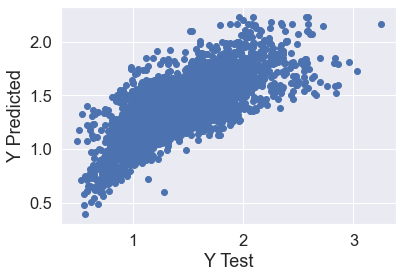

In [63]:
plt.scatter(x=y_test,y=y_pred_svr)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [64]:
svr_pca = SVR()
t0 = time.time()
svr_pca.fit(X_train_pca,y_train)
t1 = time.time()
y_pred_svr_pca = svr_pca.predict(X_test_pca)
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_svr_pca,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_svr_pca,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_svr_pca,y_test))))
model_accuracy_pca(svr_pca)

Training took 11.82s

MAE: 0.21608620729963254
MSE: 0.08046979045209285
RMSE: 0.28367197685371187
Accuracy: 48.52 %
Standard Deviation: 1.21 %


Text(0, 0.5, 'Y Predicted')

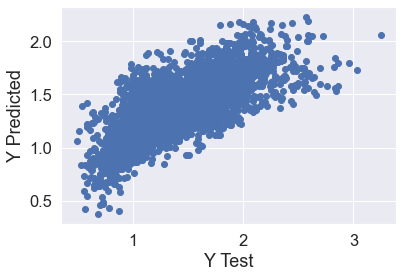

In [65]:
plt.scatter(x=y_test,y=y_pred_svr_pca)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [66]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
t0 = time.time()
dt.fit(X_train, y_train)
t1 = time.time()
y_pred_dt = dt.predict(X_test)
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_dt,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_dt,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_dt,y_test))))
model_accuracy(dt)

Training took 0.10s

MAE: 0.13873424657534247
MSE: 0.04819534246575342
RMSE: 0.21953437650116078
Accuracy: 70.35 %
Standard Deviation: 1.75 %


Text(0, 0.5, 'Y Predicted')

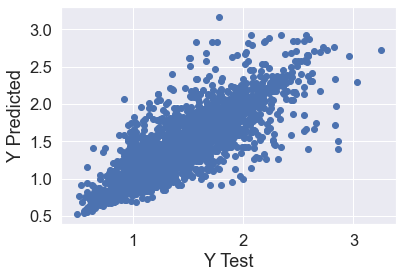

In [67]:
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [76]:
dt_pca=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
t0 = time.time()
dt_pca.fit(X_train_pca, y_train)
t1 = time.time()
y_pred_dt_pca = dt_pca.predict(X_test_pca)
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_dt_pca,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_dt_pca,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_dt_pca,y_test))))
model_accuracy_pca(dt_pca)

Training took 0.18s

MAE: 0.1487150684931507
MSE: 0.054664739726027395
RMSE: 0.23380491809632106
Accuracy: 66.09 %
Standard Deviation: 1.44 %


Text(0, 0.5, 'Y Predicted')

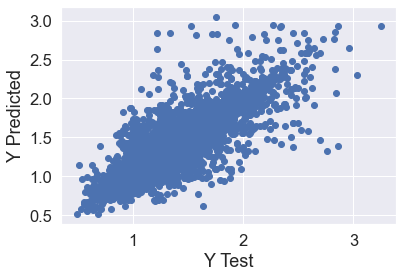

In [77]:
plt.scatter(x=y_test,y=y_pred_dt_pca)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
y_pred_rf = rf.predict(X_test)
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_rf,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_rf,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_rf,y_test))))
model_accuracy(rf)

Training took 12.99s

MAE: 0.10923164383561643
MSE: 0.02362219692876712
RMSE: 0.15369514282750488
Accuracy: 84.98 %
Standard Deviation: 0.89 %


Text(0, 0.5, 'Y Predicted')

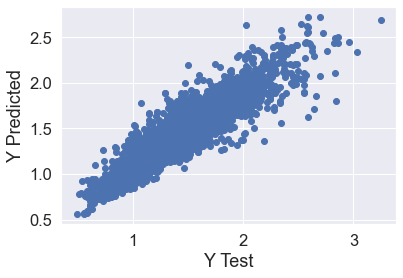

In [71]:
plt.scatter(x=y_test,y=y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

In [72]:
rf_pca = RandomForestRegressor()
t0 = time.time()
rf_pca.fit(X_train_pca, y_train)
t1 = time.time()
y_pred_rf_pca = rf_pca.predict(X_test_pca)
print("Training took {:.2f}s".format(t1 - t0))
print('\nMAE: {}'.format(mean_absolute_error(y_pred_rf_pca,y_test)))
print('MSE: {}'.format(mean_squared_error(y_pred_rf_pca,y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred_rf_pca,y_test))))
model_accuracy_pca(rf_pca)

Training took 52.59s

MAE: 0.12213550684931503
MSE: 0.029970294986301358
RMSE: 0.1731193085311438
Accuracy: 80.58 %
Standard Deviation: 1.17 %


Text(0, 0.5, 'Y Predicted')

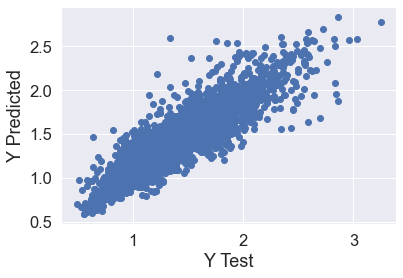

In [73]:
plt.scatter(x=y_test,y=y_pred_rf_pca)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')